In [2]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100,
                      n_features=1,
                      random_state=42,
                      noise=20)
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=30,random_state=42)

model_normal = SGDRegressor()
model_normal.fit(X_train,y_train)
y_pred = model_normal.predict(X_test)
r2_score(y_test,y_pred) * 100 

80.94133802594294

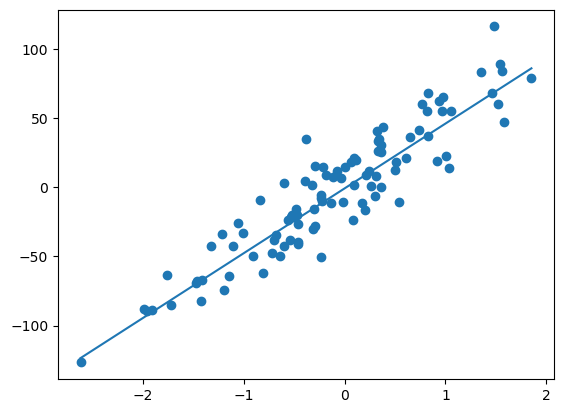

In [3]:
import numpy as np
x_draw = np.linspace(X_train.min(),X_train.max(),100)
y_draw = model_normal.intercept_ + (model_normal.coef_*x_draw)

plt.plot(x_draw,y_draw)
plt.scatter(X,y)
plt.show()

-2.1111922542592256


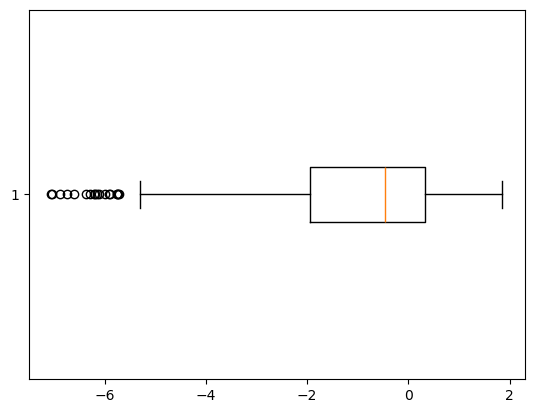

-7.52728861506422

In [6]:
# <------------------Model With outliers(Linear Regression Solved With SGD):----------------->
Q1 = np.percentile(X,25)
Q3 = np.percentile(X,75)
IQR = (Q3-Q1)
min = Q1 - 1.5*IQR
print(min)
outliers_x = np.random.uniform(min-5,min-2,30).reshape(30,1)
X_outliers = np.concatenate((X,outliers_x),axis=0)
plt.boxplot(X_outliers,orientation="horizontal")
plt.show()
y_ = np.random.uniform(0,50,30)
y_new = np.concatenate((y,y_),axis=0)

X_train,X_test,y_train,y_test = train_test_split(X_outliers,y_new,test_size=30,random_state=42)
model_outliers = SGDRegressor()
model_outliers.fit(X_train,y_train)
y_pred = model_outliers.predict(X_test)
r2_score(y_test,y_pred) * 100 

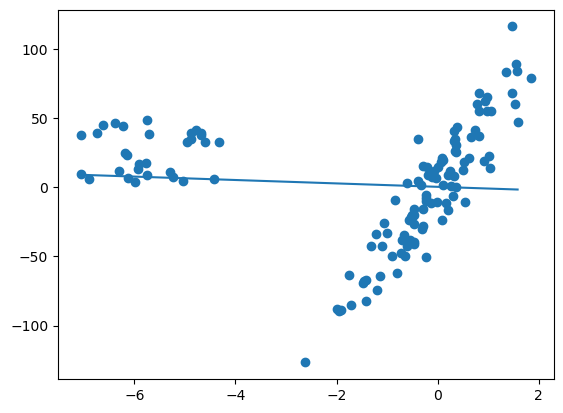

In [7]:
x_draw = np.linspace(X_train.min(),X_train.max(),100)
y_draw = model_outliers.intercept_ + (model_outliers.coef_*x_draw)

plt.plot(x_draw,y_draw)
plt.scatter(X_outliers,y_new)
plt.show()


In [8]:
#<------------- Without Outliers(Random Forest Tree Algorithrm based of if-else):------------------->
from sklearn.ensemble import RandomForestRegressor

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=30,random_state=42)
model_rf = RandomForestRegressor(n_estimators=100,random_state=42,criterion="absolute_error")
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
r2_score(y_test,y_pred) * 100 

75.50479991154492

In [9]:
#<---------------- Without Outliers(Decision Tree Algorithrm based of if-else):---------------------->
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test = train_test_split(X_outliers,y_new,test_size=30,random_state=42)
model_normal = RandomForestRegressor(n_estimators=100,random_state=42,criterion="absolute_error")
model_normal.fit(X_train,y_train)
y_pred = model_normal.predict(X_test)
r2_score(y_test,y_pred) * 100 

82.46411571701033